In [93]:
import urllib.request

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
english = set()
i = 0
for line in urllib.request.urlopen(r'https://raw.githubusercontent.com/eneko/data-repository/master/data/words.txt'):
    try: 
#         print(line)
        word = line.decode('utf-8').split('\n')[0]
        english.add(word)
        i += 1
    except AttributeError:
        pass

#     if i == 10:
#         break

In [65]:
'GARBO' in english

False

In [66]:
d = {x: [] for x in range(1, 50)}
for line in urllib.request.urlopen(r'http://norvig.com/google-books-common-words.txt'):
    word = (line.decode('utf-8')).split('\t')[0].lower()
    if word in english:
        d[len(word)].append(word)
    

In [81]:
i = 3000
d[5][i:i+20]

['picot',
 'issei',
 'brack',
 'salar',
 'leman',
 'talis',
 'howdy',
 'batty',
 'sassy',
 'tress',
 'beata',
 'teems',
 'breck',
 'edify',
 'bizet',
 'grama',
 'daunt',
 'grebe',
 'tapir',
 'acoma']

In [102]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'

In [131]:
# bow = Bag Of Words
bow = {i: {letter: 0 for letter in alphabet} for i in range(5)}

for char in range(5):
    for word in d[5]:
        bow[char][word[char]] += 1

# normalize each count by dividing by 3704 (total num words)
for i in bow:
    for char in bow[i]:
        bow[i][char] = bow[i][char]/3704

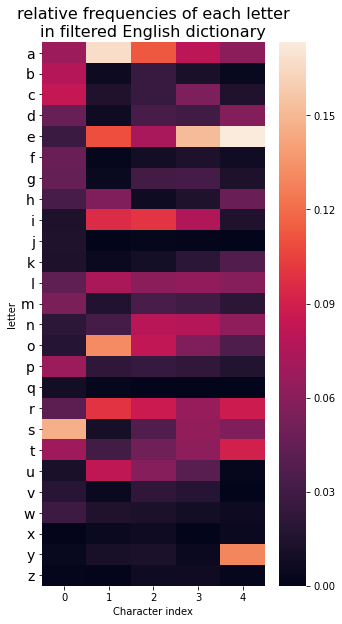

In [167]:
df = pd.DataFrame(bow)
sns.heatmap(df)
plt.gcf().set_size_inches((5, 10))
plt.xlabel('Character index')
plt.ylabel('letter')
plt.title('relative frequencies of each letter\nin filtered English dictionary', fontsize=16)
plt.yticks(ticks=[i + 0.5 for i in range(26)], labels=[letter for letter in alphabet], fontsize=14, rotation=0);

In [173]:
df[0].max() * df[1].max() * df[2].max() * df[3].max() * df[4].max() 

7.255716253523639e-05

### The theoretical maximum likelihood of a word using our filtered dictionary as training data is 7.26 e-05 using word 'saaee'

### This is obviously not a word, however. Calculating the likelihoods of our words leads to 'seine' with maximum likelihood. However, it uses double E, so 'saint' is the best with no duplicate letters

In [139]:
# Calculate likelihood of each word in english dictionary 
result = []
for word in d[5]:
    likelihood = 1
    for i, letter in enumerate(word):
        likelihood *= bow[i][letter]
    result.append((word, likelihood))
        
result = sorted(result, key=lambda x: x[1], reverse=True)

In [140]:
result

[('seine', 2.1411828709166904e-05),
 ('shree', 1.8680108540722916e-05),
 ('saint', 1.6970527428666966e-05),
 ('salle', 1.6529809210665365e-05),
 ('caret', 1.6484064398646927e-05),
 ('slane', 1.5985019212627725e-05),
 ('carer', 1.5842469077741505e-05),
 ('soler', 1.56885839120999e-05),
 ('saute', 1.525999407981246e-05),
 ('sonny', 1.5213794627426583e-05),
 ('sorry', 1.4157128766497412e-05),
 ('sense', 1.3955000141921879e-05),
 ('sauce', 1.3594055861492319e-05),
 ('carse', 1.3258236533145374e-05),
 ('carte', 1.2864983754619875e-05),
 ('slate', 1.2844103156813157e-05),
 ('suite', 1.2786622838156083e-05),
 ('sooty', 1.2768655200103459e-05),
 ('donee', 1.2654879840699366e-05),
 ('puree', 1.2505922257714785e-05),
 ('crane', 1.2410394776161776e-05),
 ('sally', 1.2384483224813147e-05),
 ('salty', 1.206828365311579e-05),
 ('sence', 1.2062796732847725e-05),
 ('borne', 1.1802860824901766e-05),
 ('borer', 1.1678620184639644e-05),
 ('siren', 1.1559418829705552e-05),
 ('cease', 1.13407479583684e-05)

In [149]:
def containsAny(str1, str2, max_repeat=0):
    """ Check whether sequence str1 contains ANY of the letters in str2. """
    set_ = set(x for x in str2)
    return 1 in [c in str1 for c in set_]

In [151]:
containsAny('s', set(['s', 'e', 'i', 'n']))

True

In [154]:
result

[('seine', 2.1411828709166904e-05),
 ('shree', 1.8680108540722916e-05),
 ('saint', 1.6970527428666966e-05),
 ('salle', 1.6529809210665365e-05),
 ('caret', 1.6484064398646927e-05),
 ('slane', 1.5985019212627725e-05),
 ('carer', 1.5842469077741505e-05),
 ('soler', 1.56885839120999e-05),
 ('saute', 1.525999407981246e-05),
 ('sonny', 1.5213794627426583e-05),
 ('sorry', 1.4157128766497412e-05),
 ('sense', 1.3955000141921879e-05),
 ('sauce', 1.3594055861492319e-05),
 ('carse', 1.3258236533145374e-05),
 ('carte', 1.2864983754619875e-05),
 ('slate', 1.2844103156813157e-05),
 ('suite', 1.2786622838156083e-05),
 ('sooty', 1.2768655200103459e-05),
 ('donee', 1.2654879840699366e-05),
 ('puree', 1.2505922257714785e-05),
 ('crane', 1.2410394776161776e-05),
 ('sally', 1.2384483224813147e-05),
 ('salty', 1.206828365311579e-05),
 ('sence', 1.2062796732847725e-05),
 ('borne', 1.1802860824901766e-05),
 ('borer', 1.1678620184639644e-05),
 ('siren', 1.1559418829705552e-05),
 ('cease', 1.13407479583684e-05)

In [185]:
# Based on result, find the sequence of 5 words that contain no repeated letters from the previous words used
for i, (word, likelihood) in enumerate(result): 
    if not containsAny(word, 'saint') and (len(set(word)) == 5):
        print(word, i)
        break

cored 88


## Starting with 'saint', the next best word with the highest likelihood and no repeated letters is 'cored'. After that, 'bulky'. After that there are no words that contain no repeat letters. 

In [198]:
# Allow for x repeat letters
def contains_repeats(word, search, max_repeats):
    s = set(letter for letter in search)
    repeats = 0
    for letter in word:
        if letter in s:
            repeats += 1
    if repeats <= max_repeats:
        return True
    else:
        return False

In [212]:
for i, (word, score) in enumerate(result[2:]):
    if contains_repeats(word, 'saintcoredbulky', 1) and (len(set(word)) >= 4):
        print(word, i)
        

humph 3348
whiff 3638


## If we allow for 1 repeat letter, then the next best word after 'saint' is 'soler'.

### The next best word with only 1 repeat of characters in 'saintcoredbulky' and 1 double letter in the word is 'humph'

In [227]:
rdf = pd.DataFrame(result, columns=['i', 'l']).set_index('i')
rdf

,l
i,
seine,2.141183e-05
shree,1.868011e-05
saint,1.697053e-05
salle,1.652981e-05
caret,1.648406e-05
...,...
ethyl,1.348889e-09
usque,9.249568e-10
kudzu,6.968371e-10


In [239]:
(rdf.loc['laser'] + rdf.loc['chino'] + rdf.loc['bumpy']).values

array([5.29836631e-06])

In [241]:
(rdf.loc['saint'] + rdf.loc['cored'] + rdf.loc['bulky']).values

array([2.63466779e-05])

In [242]:
2.635e-05 / 5.298e-06

4.973574933937335